In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

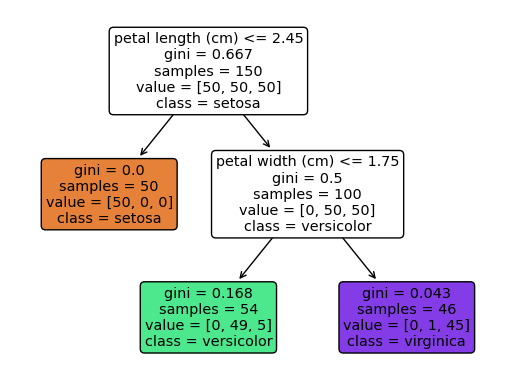

In [3]:
from sklearn.tree import plot_tree

plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [4]:
print(tree_clf.predict_proba([[5,1.5]]))
print(tree_clf.predict([[5,1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


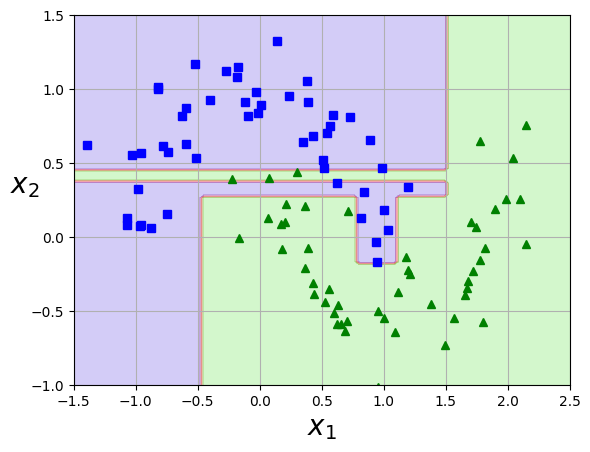

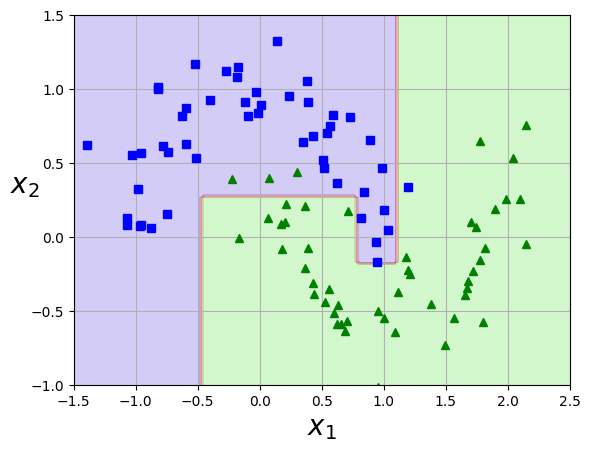

In [8]:

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

import matplotlib.pyplot as plt
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

X, y = make_moons(n_samples=100, noise=0.20)

tree_clf_with_params = DecisionTreeClassifier(min_samples_leaf=4)
tree_clf_default = DecisionTreeClassifier()

tree_clf_default.fit(X,y)

plot_predictions(tree_clf_default, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


tree_clf_with_params.fit(X,y)
plot_predictions(tree_clf_with_params, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


In [21]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [22]:
#regression
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'petal length (cm) <= 0.197\nsquared_error = 0.098\nsamples = 200\nvalue = 0.354'),
 Text(0.25, 0.5, 'petal length (cm) <= 0.092\nsquared_error = 0.038\nsamples = 44\nvalue = 0.689'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.018\nsamples = 20\nvalue = 0.854'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.013\nsamples = 24\nvalue = 0.552'),
 Text(0.75, 0.5, 'petal length (cm) <= 0.772\nsquared_error = 0.074\nsamples = 156\nvalue = 0.259'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.015\nsamples = 110\nvalue = 0.111'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.036\nsamples = 46\nvalue = 0.615')]

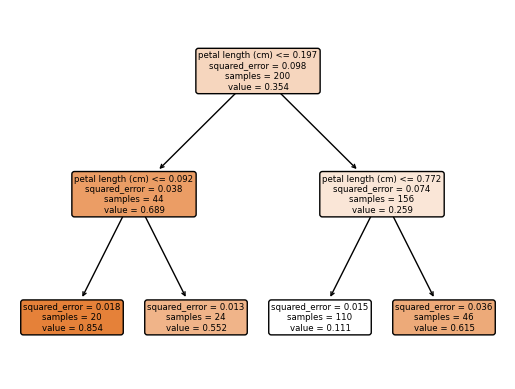

In [23]:
plot_tree(
    tree_reg,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

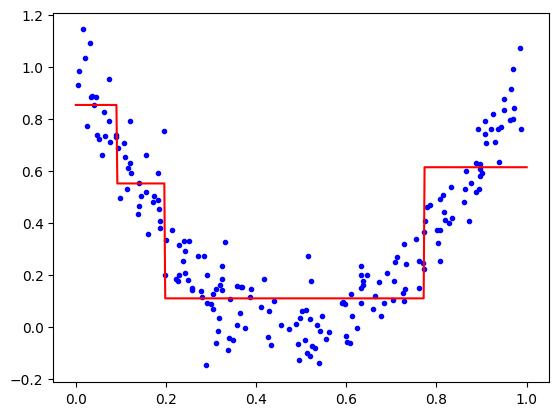

In [24]:
plt.plot(X, y, 'b.')
Xs = np.linspace(0, 1, 500).reshape(-1,1)
y_pred = tree_reg.predict(Xs)
plt.plot(Xs, y_pred, 'r-')

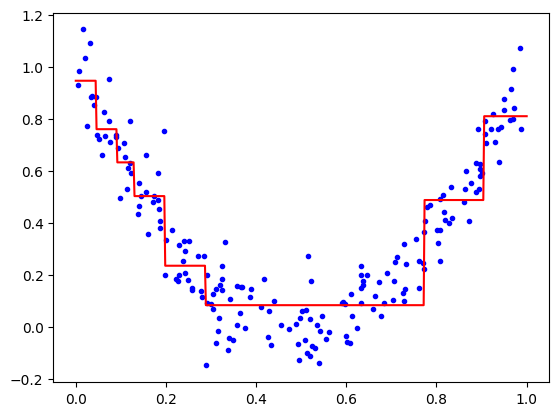

In [25]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)
plt.plot(X, y, 'b.')
Xs = np.linspace(0, 1, 500).reshape(-1,1)
y_pred = tree_reg.predict(Xs)
plt.plot(Xs, y_pred, 'r-')

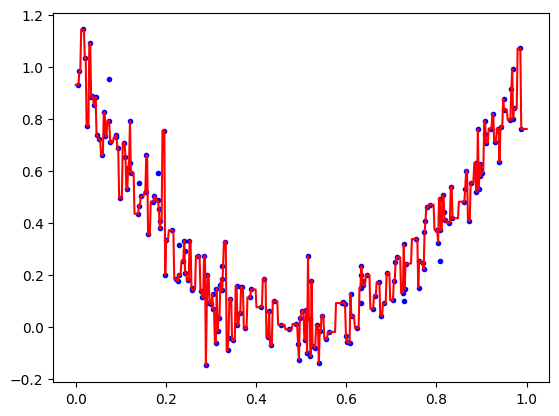

In [26]:
#no regularization
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)
plt.plot(X, y, 'b.')
Xs = np.linspace(0, 1, 500).reshape(-1,1)
y_pred = tree_reg.predict(Xs)
plt.plot(Xs, y_pred, 'r-')

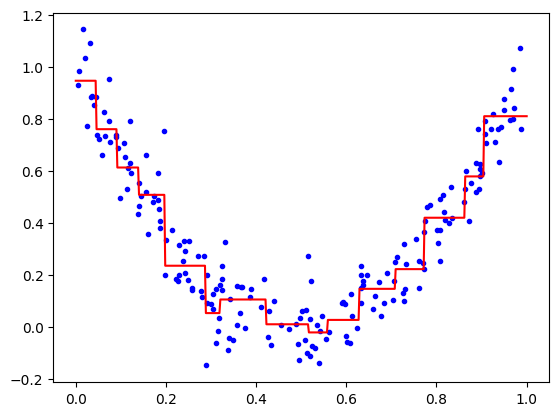

In [27]:
#with regularization
tree_reg = DecisionTreeRegressor(min_samples_leaf=10)
tree_reg.fit(X, y)
plt.plot(X, y, 'b.')
Xs = np.linspace(0, 1, 500).reshape(-1,1)
y_pred = tree_reg.predict(Xs)
plt.plot(Xs, y_pred, 'r-')